In [1]:
import numpy as np
import scipy as sp
import os

import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.preprocessing import binarize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from scipy.signal import convolve2d
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
imgs = []
path = "data"
for subdir, dirs, files in os.walk(path):
    print(subdir)
    tmp = []
    for filename in files:
        if filename.endswith(".jpg"):
            img = sp.misc.imread(os.path.join(subdir, filename), flatten=True)
            tmp.append(img)
    imgs.append(tmp)
    
X = np.array(imgs[1] + imgs[2])

Y0= np.zeros((1, len(imgs[1])))
Y1 = np.ones((1, len(imgs[2])))

Y = np.hstack((Y0, Y1))

data
data\ClosedFace
data\OpenFace


In [3]:
X.shape

(2423, 100, 100)

In [4]:
print(Y0.shape)
print(Y1.shape)

(1, 1192)
(1, 1231)


In [5]:
def show_images(input, output, input_title="", output_title="", cmap='gray'):
    fig, (im_input, im_output) = plt.subplots(1, 2, figsize=(15, 35))
    im_input.imshow(input, cmap=cmap)
    im_input.set_title(input_title)
    im_input.set_axis_off()
    im_output.imshow(output, cmap=cmap)
    im_output.set_title(output_title)
    im_output.set_axis_off()
    fig.show()
    
def show_images3(input, output, output2, input_title="", output_title="", cmap='gray'):
    fig, (im_input, im_output, im_output2) = plt.subplots(1, 3, figsize=(15, 45))
    im_input.imshow(input, cmap=cmap)
    im_input.set_title(input_title)
    im_input.set_axis_off()
    im_output.imshow(output, cmap=cmap)
    im_output.set_title(output_title)
    im_output.set_axis_off()
    im_output2.imshow(output2, cmap=cmap)
    im_output2.set_title(output_title)
    im_output2.set_axis_off()
    fig.show()


In [6]:
def show_image(input, input_title="", cmap='gray'):
    fig, img = plt.subplots(1, 1, figsize=(3, 3))
    img.imshow(input, cmap=cmap)
    img.set_title(input_title)
    img.set_axis_off()
    fig.show()

In [7]:
def my_imshow(img, ax=None):
    if ax is None:
        ax = plt.gca()
        
    ax.imshow(img, cmap='gray')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.yaxis.set_tick_params(size=0)
    ax.xaxis.set_tick_params(size=0)

In [8]:
def r(fun):
    
    def wrapped(img):
        
        if len(img.shape) < 2:
            img = img.reshape(100, 100)
            res = fun(img)
            res = res.reshape(10000)
        else:
            res = fun(img)
        return res
    
    return wrapped

In [9]:
# Input your code here
@r
def edges(img):
    
    def gaussian_kernel_2d(sigma, r):
    
        def gaussian(x, y):
            return np.exp((-x*x - y*y)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
    
        return np.array([[gaussian(x, y) for y in range(-r, r+1)] for x in range(-r, r+1)])
    
    square_kernel = np.ones((3, 3))
    square_kernel[1, 1] = -8
    gaussian_kernel = gaussian_kernel_2d(4, 12)
    res = convolve2d(img.reshape(100, 100), gaussian_kernel, mode="same")
    res = convolve2d(res, square_kernel, mode="same")
    
    res += np.abs(res.min())
    res /= res.max()
    
    return res.reshape(10000)

In [10]:
def show_grid(k1, k2, X):
    m = X.shape[0]
    _, axarr = plt.subplots(k1, k2, figsize=(10, 10))

    for i in range(axarr.shape[0]):
        for j in range(axarr.shape[1]):

            n = i*k2+j
            img = X[(i%2)*(m-2*n)+n]
            axarr[i, j].set_axis_off()
            axarr[i, j].imshow(edges(img), cmap="gray")


In [11]:
X_train = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

edges_X = np.apply_along_axis(edges, 1, X_train)
edges_X = edges_X.reshape(X_train.shape)

In [12]:
def bin_data(X):
    
    res = np.zeros_like(X)
    
    for i, x in enumerate(X):
        res[i, :] = binarize(x, 1.1*x.mean())
        
    return res

In [13]:
bin_X = bin_data(edges_X)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

0.649847039268
0.251766197132


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


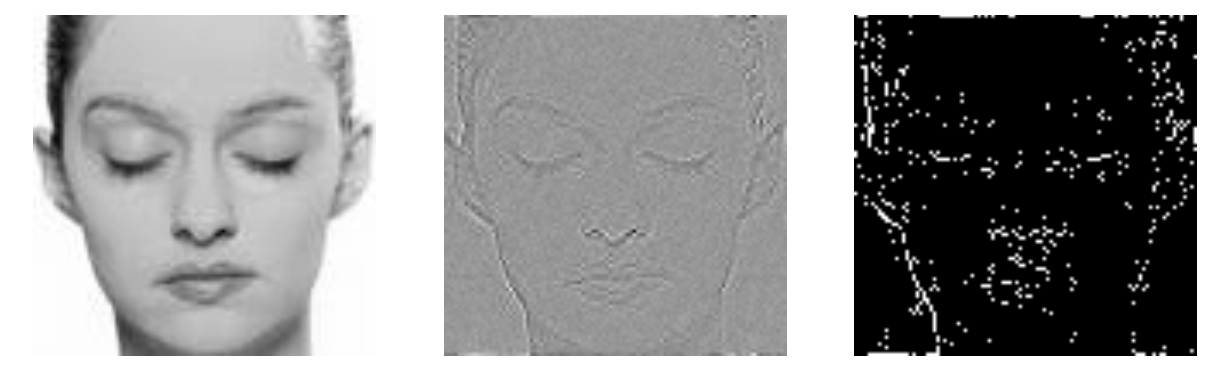

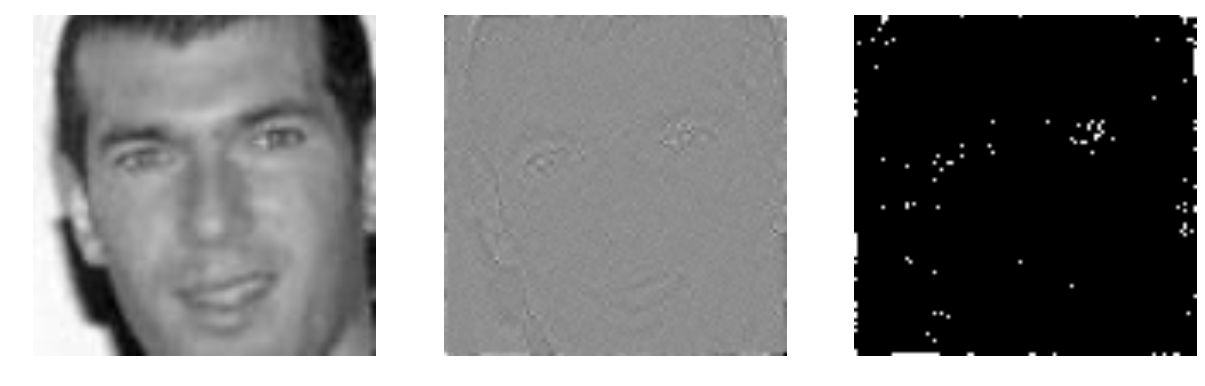

In [136]:
img1 = edges_X[200].reshape(100, 100)
img2 = edges_X[2420].reshape(100, 100)


print(1.1*img1.mean())
print(1.1*img2.mean())

show_images3(X[200], img1, binarize(img1, 1.1*img1.mean()))
show_images3(X[2420], img2, binarize(img2, 1.1*img2.mean()))



#img = binarize(img, 0.66)
#show_images(img, edges_X[200].reshape(100, 100))
#show_images(X[2420], edges_X[2420].reshape(100, 100))

## Traning classifiers without PCA

X_train - original data

edges_X - edge detection

bin_X - with binarization

y - labels

In [14]:
def try_classifier(X, y, clf, params):
    
    gs = GridSearchCV(clf, param_grid=params, verbose=2, n_jobs=4, cv=4, scoring="accuracy")
    
    gs.fit(X, y)
    
    return gs.best_estimator_, gs.best_score_

### LR

In [15]:
param_grid = {'C': [0.01, 0.1, 1], 'penalty':['l1', 'l2']}

LR = []
LR.append(try_classifier(X_train, Y[0], LogisticRegression(), param_grid))
LR.append(try_classifier(edges_X, Y[0], LogisticRegression(), param_grid))
LR.append(try_classifier(bin_X, Y[0], LogisticRegression(), param_grid))

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  1.1min finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    7.6s finished


In [16]:
print("LR:", LR[0][1], LR[1][1], LR[2][1])

IndexError: list index out of range

### Adaboost

In [185]:
param_grid = {"n_estimators": np.arange(10, 100, 20)}
clf = AdaBoostClassifier()

ADA = []
ADA.append(try_classifier(edges_X, Y[0], clf, param_grid))
ADA.append(try_classifier(bin_X, Y[0], clf, param_grid))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  9.9min finished


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  9.9min finished


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  2.2min finished


In [188]:
print("ADA:", ADA[0][1], ADA[1][1])

ADA: 0.777548493603 0.619892695006 0.629797771358


### Random Forest

In [194]:
param_grid = {'n_estimators' : [100, 250]}
clf = RandomForestClassifier()

RF = []
RF.append(try_classifier(edges_X, Y[0], clf, param_grid))
RF.append(try_classifier(bin_X, Y[0], clf, param_grid))

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=6)]: Done   2 out of   8 | elapsed:   16.7s remaining:   50.2s
[Parallel(n_jobs=6)]: Done   8 out of   8 | elapsed:   53.4s finished


Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=6)]: Done   2 out of   8 | elapsed:    6.9s remaining:   20.9s
[Parallel(n_jobs=6)]: Done   8 out of   8 | elapsed:   18.2s finished


In [195]:
print("RF:", RF[0][1], RF[1][1])

RF: 0.640115559224 0.654147750722


# PCA

# autocontrast+hog

In [18]:
from operator import itemgetter
from skimage.feature import hog

def autocontrast(image, white_perc=0.2, black_perc = 0.2):
    img = image
    sorted_img = sorted(np.ndenumerate(img), key=itemgetter(1))
    pixels_number = len(sorted_img)
    black_border = float(black_perc)*pixels_number
    white_border = float(white_perc)*pixels_number
    for e in enumerate(sorted_img):
        if (int(round(black_border)) <= e[0] and 
           (e[0] == 0 or e[0] == pixels_number - 1 or img[e[1][0]] != sorted_img[e[0] + 1][1])):
            black_threshold_number = e[0]
            break
        else:
            img[e[1][0]] = 0

    reversed_sorted_img = list(reversed(sorted_img))
    for e in enumerate(reversed_sorted_img):
        if (int(round(white_border)) <= e[0] and 
           (e[0] == 0 or e[0] == pixels_number - 1 or img[e[1][0]] != reversed_sorted_img[e[0] + 1][1])):
            white_threshold_number = pixels_number - e[0] - 1
            break
        else:
            img[e[1][0]] = 255

    black_threshold = sorted_img[black_threshold_number][1]
    white_threshold = sorted_img[white_threshold_number][1]

    for e in enumerate(sorted_img[black_threshold_number : white_threshold_number + 1]):
        img[e[1][0]] = (img[e[1][0]] - black_threshold)*255 / float(white_threshold - black_threshold)

    return img


In [19]:
def get_df_faces(X):

    img = X.reshape(100, 100)
    
    autocontrast(img, white_perc=0., black_perc = 0.)
    img = hog(img, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(3, 3), visualise=False)
    
    return img

In [20]:
hog_X = np.apply_along_axis(get_df_faces, 1, X_train)

In [21]:
hog_X.shape

(2423, 38088)

In [42]:
def pca_transform(X, n_components):

    pca = PCA(n_components=n_components, svd_solver='randomized').fit(X)

    black_idx = [x for x in range(1192)]
    white_idx = [1192 + x for x in range(1231)]

    black_coords = np.empty((len(black_idx), n_components))
    white_coords = np.empty((len(white_idx), n_components))

    for coords, indices in ((black_coords, black_idx), (white_coords, white_idx)):
        for i,idx in enumerate(indices):
            for x in range(n_components):
                coords[i, x] = X[idx].dot(pca.components_[x])


    res = np.concatenate((black_coords, white_coords))
    return res

In [59]:
pca_bin_X = pca_transform(bin_X, 150)
pca_edges_X = pca_transform(edges_X, 150)
pca_hog_X = pca_transform(hog_X, 150)

In [63]:
param_grid = {'C': [0.01, 0.1, 1], 'penalty':['l1', 'l2']}

pca_LR = []
pca_LR.append(try_classifier(pca_bin_X, Y[0], LogisticRegression(), param_grid))
pca_LR.append(try_classifier(pca_edges_X, Y[0], LogisticRegression(), param_grid))
pca_LR.append(try_classifier(pca_hog_X, Y[0], LogisticRegression(), param_grid))

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.8s finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:   27.8s finished


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    1.1s finished


In [64]:
print("LR:", pca_LR[0][1], pca_LR[1][1], pca_LR[2][1])

LR: 0.508047874536 0.801073049938 0.88113908378


# Time

In [18]:
test_img = edges_X[0]

#clf = LR[1][0]

#%timeit clf.predict(X[0])
%timeit edges(X_train[0])

10 loops, best of 3: 25.7 ms per loop


In [164]:
%timeit pca.transform(X_df[0])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

10 loops, best of 3: 23.5 ms per loop


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [158]:
def apply_method2(X, clf, threshold, n):
    
    bX = X
    pca = PCA(n_components=n, svd_solver='randomized').fit(bX)
    
    black_idx = [x for x in range(1000)]
    white_idx = [2200 - x for x in black_idx]

    black_coords = np.empty((len(black_idx), n))
    white_coords = np.empty((len(white_idx), n))

    for coords, indices in ((black_coords, black_idx), (white_coords, white_idx)):
        for i,idx in enumerate(indices):
            for x in range(n):
                coords[i, x] = X[idx].dot(pca.components_[x])


    tmp_X = np.concatenate((black_coords, white_coords))
    tmp_Y = [0]*len(black_idx) + [1]*len(white_idx)


    x_train, x_test, y_train, y_test = train_test_split(tmp_X, tmp_Y)
    clf.fit(x_train, y_train)
    
    %timeit clf.predict(x_test)
    
    print('Final Accuracy: ', clf.score(x_test, y_test))


In [67]:
def pca_plot(pca, k1, k2, n=25):
   
    show_image(pca.mean_.reshape(k2, k1)*1.0)
    plt.title('(Pixel-wise) mean face');

    eigenfaces = pca.components_[:n].reshape(5, 5, k2, k1)
    titles = np.array(['#%d' % (i+1,) \
                       for i,v in enumerate(pca.explained_variance_ratio_[:25])]).reshape(5, 5)

    _, axarr = plt.subplots(5, 5, figsize=(20, 20))

    for x in range(5):
        for y in range(5):
            my_imshow(eigenfaces[x,y], axarr[x,y])
            axarr[x,y].set_title(titles[x,y], fontsize=10)

    plt.suptitle('25 principal components', size=20)
    plt.show()

In [68]:
['0.7635', '0.02', '200', '0.1', 'l1']

bX = binarize(new_X, 0.01)
pca, tmp_X, tmp_Y = pca_transform(bX, 200)

In [61]:
m = np.array(pca.mean_, dtype=float)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


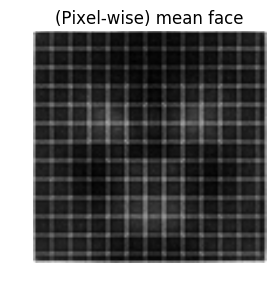

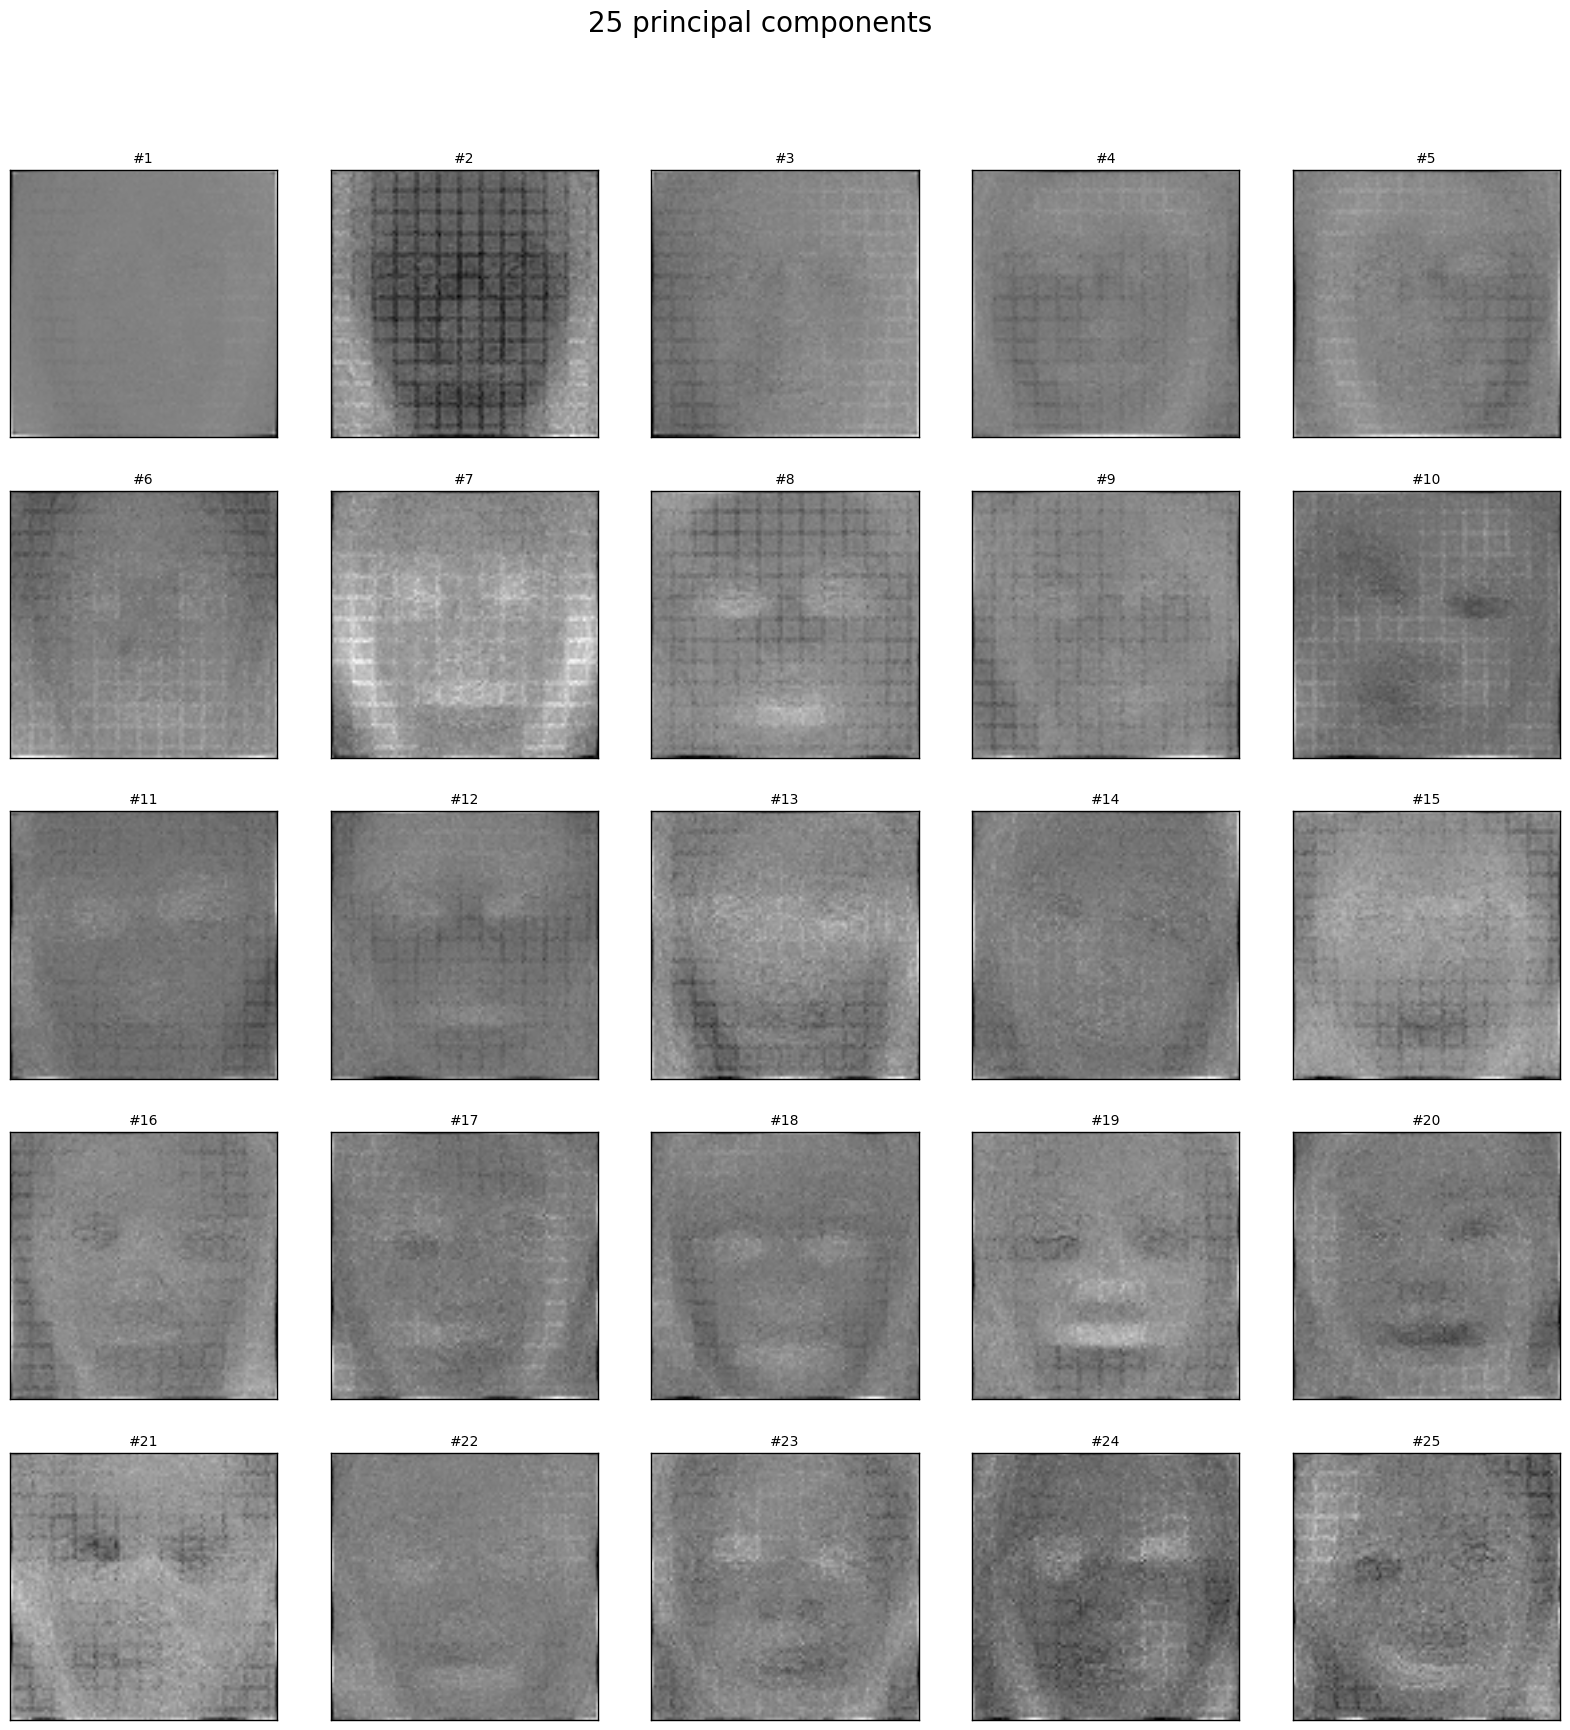

In [69]:
pca_plot(pca, 100, 100)

In [53]:
clf = LogisticRegression(C=0.1, penalty='l2')

pca, tmp_X, tmp_Y = pca_transform(new_X, 100, 100)

TypeError: pca_transform() takes 2 positional arguments but 3 were given

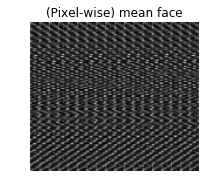

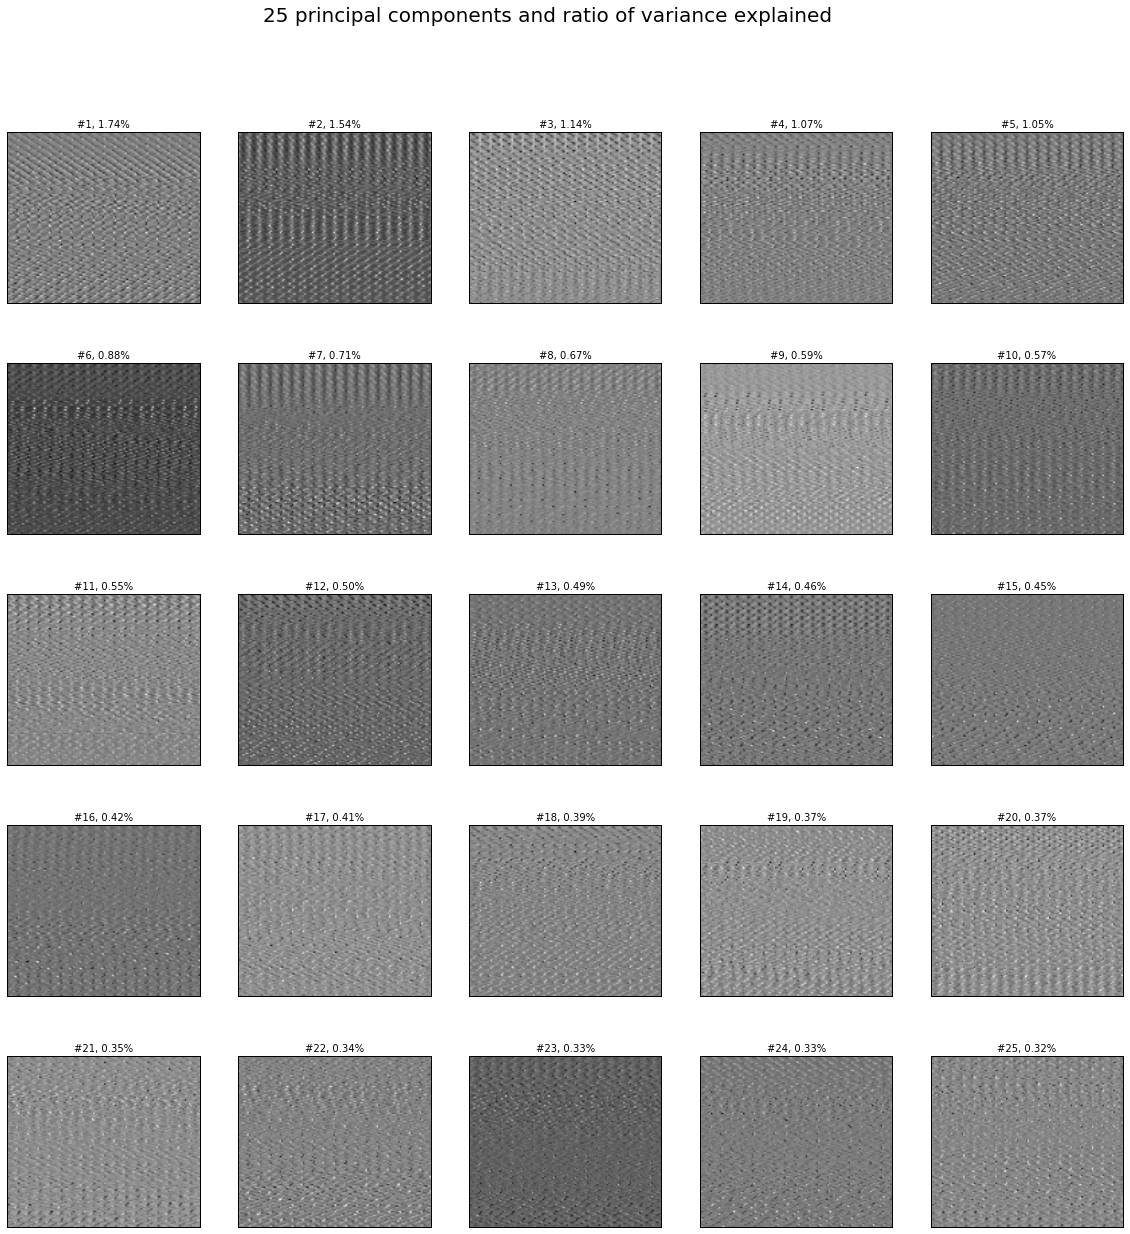

In [258]:
pca_plot (pca)